In [1]:
import unicodecsv
import pandas as pd
#read data from CSV file and make it to lists
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
    
        return list(reader)
    
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [2]:
data_all = pd.read_csv('../../../2_data/explored/test_movie.csv')

In [3]:
columns = ['Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6']
data_all.drop(columns, inplace=True, axis=1)

In [4]:
data_all.dropna(inplace=True)
data_all.drop(data_all.index[[0]])
data_all

,id,goods,quant
0,John,the matrix,5.0
1,Lucy,the matrix,1.0
2,Eric,the matrix,2.0
3,Diane,the matrix,4.0
4,John,Titanic,1.0
5,Lucy,Titanic,5.0
6,Diane,Titanic,3.0
7,Lucy,Die hard,2.0
8,Eric,Die hard,3.0
9,Diane,Die hard,5.0


In [5]:
sum_df = data_all.groupby(['id','goods'])['quant'].sum().reset_index()

In [6]:
pivot = sum_df.pivot_table(index='goods', columns='id', values='quant', aggfunc=np.sum)

In [7]:
pivot

id,Diane,Eric,John,Lucy
goods,,,,
Die hard,5.0,3.0,NaN,2.0
Forrest gump,3.0,5.0,2.0,5.0
Titanic,3.0,NaN,1.0,5.0
Wall-E,NaN,4.0,2.0,5.0
the matrix,4.0,2.0,5.0,1.0


In [8]:
pivot_value= pivot.values

In [9]:
#mean = pivot[~np.isnan(pivot)].mean(axis=1).as_matrix()

In [10]:
import numpy as np

def mean_of_array(x):
    valid_value = x[~np.isnan(x)]
    return np.mean(valid_value)

In [11]:
mean_of_array(pivot)

id
Diane    3.75
Eric     3.50
John     2.50
Lucy     3.60
dtype: float64

In [12]:
def user_based_mean_centered(pivot_score_table):
    mean_of_each_row = np.apply_along_axis(mean_of_array , axis=1, arr=pivot_score_table)
    user_mean_centered_rating = (pivot_score_table.transpose() - mean_of_each_row).transpose()
    return user_mean_centered_rating

In [13]:
user_based_mean_centered(pivot_value)

array([[ 1.66666667, -0.33333333,         nan, -1.33333333],
       [-0.75      ,  1.25      , -1.75      ,  1.25      ],
       [ 0.        ,         nan, -2.        ,  2.        ],
       [        nan,  0.33333333, -1.66666667,  1.33333333],
       [ 1.        , -1.        ,  2.        , -2.        ]])

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


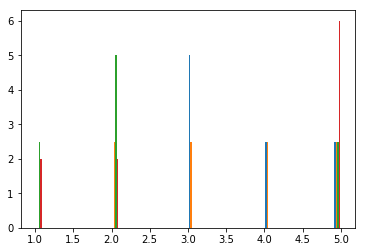

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plot_age = pivot_value
plt.hist(plot_age, normed=True, bins=40)

plt.show()



# z_score

In [14]:
import numpy as np

def std_of_array(x):
    valid_value = x[~np.isnan(x)]
    return np.std(valid_value)

In [15]:
def user_based_z_score_normalize(pivot_score_table):
    mean_of_each_column = np.apply_along_axis(mean_of_array , axis=0, arr=pivot_score_table)
    std_of_each_column = np.apply_along_axis(std_of_array , axis=0, arr=pivot_score_table)
    z_score_normalized = (pivot_score_table - mean_of_each_column)/std_of_each_column
    return z_score_normalized

In [16]:
user_based_z_score_normalize(pivot_value)

array([[ 1.50755672, -0.4472136 ,         nan, -0.91766294],
       [-0.90453403,  1.34164079, -0.33333333,  0.80295507],
       [-0.90453403,         nan, -1.        ,  0.80295507],
       [        nan,  0.4472136 , -0.33333333,  0.80295507],
       [ 0.30151134, -1.34164079,  1.66666667, -1.49120227]])

In [17]:
table =user_based_z_score_normalize(pivot[:])
table

id,Diane,Eric,John,Lucy
goods,,,,
Die hard,1.507557,-0.447214,NaN,-0.917663
Forrest gump,-0.904534,1.341641,-0.333333,0.802955
Titanic,-0.904534,NaN,-1.000000,0.802955
Wall-E,NaN,0.447214,-0.333333,0.802955
the matrix,0.301511,-1.341641,1.666667,-1.491202


# pearson

In [24]:
def pearson(pivot_table):
    row = pivot_table.shape[1]
    pc = np.zeros([row, row])
    for u in range(row):
        value_u = pivot_table.values[:,u]
        mean = mean_of_array(value_u)
        ru = value_u-mean
        for v in range(row):
            value_v = pivot_table.values[:,v]
            mean    = mean_of_array(value_v)
            rv = value_v-mean
            uv_set = ~np.isnan(ru*rv)
            upper = sum((ru*rv)[uv_set])
            lower_left = sum((ru*ru)[uv_set])
            lower_right = sum((rv*rv)[uv_set])
            pc[u,v] = upper/np.sqrt(lower_left*lower_right)
            column_name_list = list(pivot_table)
    pc_df = pd.DataFrame(pc, index=column_name_list, columns=column_name_list)
    return pc_df
            

In [25]:
pearson(table)

,Diane,Eric,John,Lucy
Diane,1.000000,-0.659232,0.659232,-0.787197
Eric,-0.659232,1.000000,-0.838870,0.921791
John,0.659232,-0.838870,1.000000,-0.937573
Lucy,-0.787197,0.921791,-0.937573,1.000000


# Accounting for significance

In [29]:
def similarity_item_based(pivot_table_df,gamma):
    number_of_item = pivot_table_df.shape[1]
    pc = np.zeros([number_of_item, number_of_item])
    for u in range(number_of_item):
        rui = pivot_table_df.values[:,u]
        ru = mean_of_array(rui)
        deltai = rui - ru
        for v in range(number_of_item):
            ruv = pivot_table_df.values[:,v]
            rv = mean_of_array(ruv)
            deltaj = ruv-rv

            uv_set = ~np.isnan(deltai*deltaj)
            upper = sum((deltai*deltaj)[uv_set])
            lower_left = sum((deltai*deltai)[uv_set])
            lower_right = sum((deltaj*deltaj)[uv_set])
            wuv = upper/np.sqrt(lower_left*lower_right)
            
            # Accounting for significance
            uv_set_number = sum(uv_set)
            pc[u,v] = wuv*(min(uv_set_number,gamma)/gamma)
            
    column_name_list = list(pivot_table_df)
    pc_df = pd.DataFrame(pc, index=column_name_list, columns=column_name_list)
    return pc_df

In [30]:
similarity_item_based(table,4)

,Diane,Eric,John,Lucy
Diane,1.000000,-0.494424,0.494424,-0.787197
Eric,-0.494424,1.000000,-0.629153,0.921791
John,0.494424,-0.629153,1.000000,-0.937573
Lucy,-0.787197,0.921791,-0.937573,1.000000


เมื่อเทียบกับก่อนทำaccounting for significance

In [31]:
pearson(table)

,Diane,Eric,John,Lucy
Diane,1.000000,-0.659232,0.659232,-0.787197
Eric,-0.659232,1.000000,-0.838870,0.921791
John,0.659232,-0.838870,1.000000,-0.937573
Lucy,-0.787197,0.921791,-0.937573,1.000000


# Neighborhood Selection

In [34]:
similarity_item_based(table,4)

,Diane,Eric,John,Lucy
Diane,1.000000,-0.494424,0.494424,-0.787197
Eric,-0.494424,1.000000,-0.629153,0.921791
John,0.494424,-0.629153,1.000000,-0.937573
Lucy,-0.787197,0.921791,-0.937573,1.000000


In [35]:
def prefiltering_of_neighbors(neighbors_weight_table, thershold):
    # Negative filtering & Thershold filtering
    neighbors_weight_table[neighbors_weight_table < thershold] = 0
    return neighbors_weight_table

In [37]:
prefiltering_of_neighbors(similarity_item_based(table,4),0.5)

,Diane,Eric,John,Lucy
Diane,1.0,0.000000,0.0,0.000000
Eric,0.0,1.000000,0.0,0.921791
John,0.0,0.000000,1.0,0.000000
Lucy,0.0,0.921791,0.0,1.000000


In [39]:
similarity_weight = prefiltering_of_neighbors(similarity_item_based(table,4),0.5)
similarity_weight

,Diane,Eric,John,Lucy
Diane,1.0,0.000000,0.0,0.000000
Eric,0.0,1.000000,0.0,0.921791
John,0.0,0.000000,1.0,0.000000
Lucy,0.0,0.921791,0.0,1.000000


# Prediction

In [43]:
def predict_score(pivot_score_table,weight):
    # initial variable
    score_table = pivot_score_table[:].copy()
    number_of_item = pivot_score_table.shape[1]
    mean_of_each_column = np.apply_along_axis(mean_of_array , axis=0, arr=pivot_score_table)
    std_of_each_column = np.apply_along_axis(std_of_array , axis=0, arr=pivot_score_table)
#     z_score_normalized = (pivot_score_table - mean_of_each_column)/std_of_each_column
    
    # get NaN index
    nan_index = np.argwhere(np.isnan(pivot_score_table).values)
    
    # for loop to predict each NaN and fill value to it       
    for nan_pos in nan_index:
        u,i = nan_pos[0],nan_pos[1]
        ribar = mean_of_each_column[i]
        sigmai = std_of_each_column[i]
        
        wi = weight.values[i]
        wi[i] = 0
        ru = pivot_score_table.values[u,:]

        delta_ru_with_mean_divide_std = (ru - mean_of_each_column)/std_of_each_column
        upper_array = wi*delta_ru_with_mean_divide_std
        upper = sum(upper_array[~np.isnan(upper_array)])
        lower = sum(abs(wi))
        
        score_table.values[u][i] = ribar + sigmai*(upper/lower)
        
    return score_table

In [44]:
pivot

id,Diane,Eric,John,Lucy
goods,,,,
Die hard,5.0,3.0,NaN,2.0
Forrest gump,3.0,5.0,2.0,5.0
Titanic,3.0,NaN,1.0,5.0
Wall-E,NaN,4.0,2.0,5.0
the matrix,4.0,2.0,5.0,1.0


In [47]:
predicted_table = predict_score(pivot,similarity_weight)
predicted_table

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


id,Diane,Eric,John,Lucy
goods,,,,
Die hard,5.0,3.000000,NaN,2.0
Forrest gump,3.0,5.000000,2.0,5.0
Titanic,3.0,4.397731,1.0,5.0
Wall-E,NaN,4.000000,2.0,5.0
the matrix,4.0,2.000000,5.0,1.0


# ตัวอย่าง

ให้ inputเป็นuser_id

In [48]:
predicted_table

id,Diane,Eric,John,Lucy
goods,,,,
Die hard,5.0,3.000000,NaN,2.0
Forrest gump,3.0,5.000000,2.0,5.0
Titanic,3.0,4.397731,1.0,5.0
Wall-E,NaN,4.000000,2.0,5.0
the matrix,4.0,2.000000,5.0,1.0


In [49]:
def item_list_from_user(predicted_score_table,user_id):
    user_items = pd.DataFrame(predicted_score_table.loc[user_id])
    user_items_sorted = user_items.sort_values(by=[user_id], ascending=False)
    item_id_lists = user_items_sorted.index.values
    return item_id_lists

In [51]:
item_list_from_user(predicted_table,'Die hard')

array(['Diane', 'Eric', 'Lucy', 'John'], dtype=object)

In [56]:
def new_item_list_from_user(new_score_table, old_score_table, user_id):
    only_new_item = new_score_table[np.isnan(old_score_table)]
    user_items = pd.DataFrame(only_new_item.loc[user_id])
    user_items_sorted = user_items.sort_values(by=[user_id], ascending=False)
    item_id_lists = user_items_sorted[(user_items_sorted>0).values].index.values
    return item_id_lists

In [57]:
predicted_table[np.isnan(pivot)]

id,Diane,Eric,John,Lucy
goods,,,,
Die hard,NaN,NaN,NaN,NaN
Forrest gump,NaN,NaN,NaN,NaN
Titanic,NaN,4.397731,NaN,NaN
Wall-E,NaN,NaN,NaN,NaN
the matrix,NaN,NaN,NaN,NaN


input คือ item

ใช้ similarity_weight

In [58]:
def item_list_from_similarity(similar_table,item_id):
    item_lists = pd.DataFrame(similar_table.loc[item_id])
    items_sorted = item_lists.sort_values(by=[item_id], ascending=False)
    items_sorted[item_id][item_id] = 0
    item_id_lists = items_sorted[(items_sorted>0).values].index.values
    return item_id_lists

In [59]:
item_list_from_similarity(similarity_weight,'Eric')

array(['Lucy'], dtype=object)